##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step
Number of classes: 10


In [2]:
# Define class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


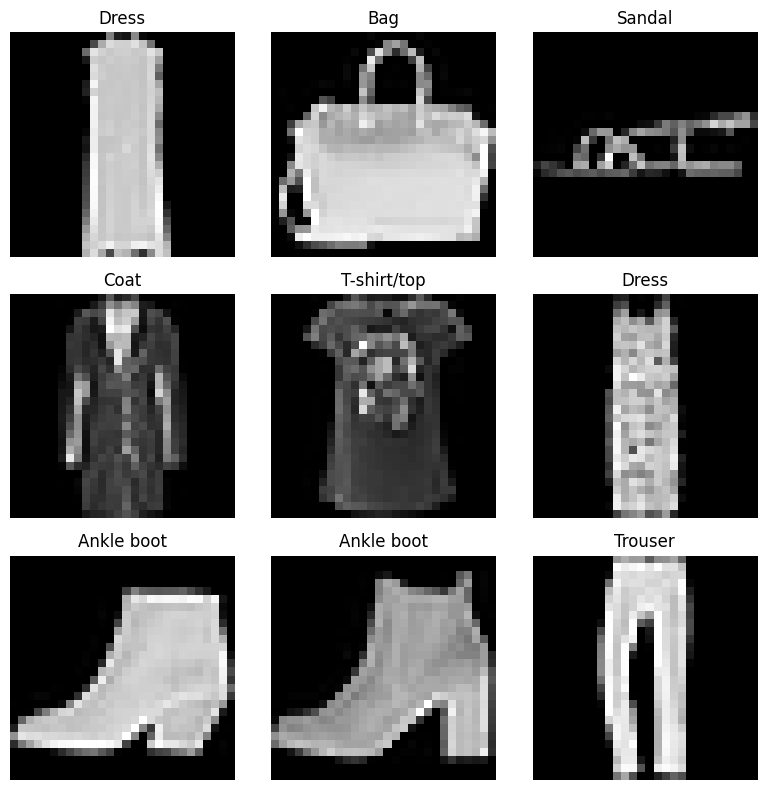

In [3]:
# Plot a 3x3 grid of random images
plt.figure(figsize=(8,8))

for i in range(9):
    index = np.random.randint(0, len(x_train))
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(class_names[y_train[index]])
    plt.axis("off")

plt.tight_layout()
plt.show()


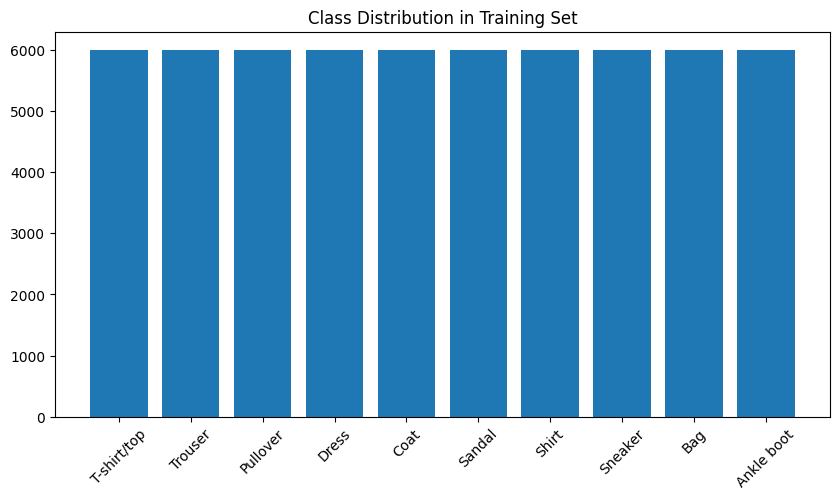

In [4]:
# Count occurrences of each class
unique, counts = np.unique(y_train, return_counts=True)

# Plot class distribution
plt.figure(figsize=(10,5))
plt.bar(class_names, counts)
plt.xticks(rotation=45)
plt.title("Class Distribution in Training Set")
plt.show()


### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [5]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = keras.Sequential([
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   
    metrics=['accuracy']
)

# Train model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1
)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy:", test_acc)

c:\Users\ragha\miniconda3\envs\cv_lab\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8310 - loss: 0.4653 - val_accuracy: 0.8758 - val_loss: 0.3462
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8838 - loss: 0.3146 - val_accuracy: 0.8952 - val_loss: 0.2859
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9015 - loss: 0.2671 - val_accuracy: 0.9025 - val_loss: 0.2648
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9130 - loss: 0.2349 - val_accuracy: 0.9068 - val_loss: 0.2563
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9233 - loss: 0.2073 - val_accuracy: 0.8982 - val_loss: 0.2657
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9305 - loss: 0.1846 - val_accuracy: 0.9118 - val_loss: 0.2563
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9366 - loss: 0.1660 - val_accuracy: 0.9155 - val_loss: 0.2461
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9443 - lo